<a href="https://colab.research.google.com/github/pachon00/03MAIR-Algoritmos-de-optimizacion/blob/master/Presentacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic data science project
End-to-end en data science
Fuente: https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish#
Solucion del Titanic Survival competition en Kaggle: https://www.kaggle.com/c/titanic

## Importación de librerias requeridas


In [0]:
# importar paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carga de información desde un dataset almacenado en Github

In [0]:
# Cargamos también un conjunto de datos
data_file_url = 'https://raw.githubusercontent.com/pachon00/03MAIR-Algoritmos-de-optimizacion/master/train.csv'
train_data = pd.read_csv(data_file_url)
data_file_url = 'https://raw.githubusercontent.com/pachon00/03MAIR-Algoritmos-de-optimizacion/master/test.csv'
test_data = pd.read_csv(data_file_url)

## Exploración del dataset

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
#train_data['Age'].isnull().sum()
aux = train_data[train_data['Sex']=='female']
aux.info()
aux2 =train_data[train_data['Sex']=='male']
aux2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 888
Data columns (total 10 columns):
PassengerId    314 non-null int64
Survived       314 non-null int64
Pclass         314 non-null int64
Sex            314 non-null object
Age            314 non-null category
SibSp          314 non-null int64
Parch          314 non-null int64
Fare           314 non-null category
Cabin          314 non-null object
Title          314 non-null object
dtypes: category(2), int64(5), object(3)
memory usage: 23.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    577 non-null int64
Survived       577 non-null int64
Pclass         577 non-null int64
Sex            577 non-null object
Age            577 non-null category
SibSp          577 non-null int64
Parch          577 non-null int64
Fare           577 non-null category
Cabin          577 non-null object
Title          577 non-null object
dtypes: category(2), int64(5

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
# operadores básicos
train_data.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
dtype: object

In [12]:
train_data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [13]:
train_data['Fare'].cumsum()

0          7.2500
1         78.5333
2         86.4583
3        139.5583
4        147.6083
5        156.0666
6        207.9291
7        229.0041
8        240.1374
9        270.2082
10       286.9082
11       313.4582
12       321.5082
13       352.7832
14       360.6374
15       376.6374
16       405.7624
17       418.7624
18       436.7624
19       443.9874
20       469.9874
21       482.9874
22       491.0166
23       526.5166
24       547.5916
25       578.9791
26       586.2041
27       849.2041
28       857.0833
29       864.9791
          ...    
861    28077.7245
862    28103.6537
863    28173.2037
864    28186.2037
865    28199.2037
866    28213.0620
867    28263.5578
868    28273.0578
869    28284.1911
870    28292.0869
871    28344.6411
872    28349.6411
873    28358.6411
874    28382.6411
875    28389.8661
876    28399.7119
877    28407.6077
878    28415.5035
879    28498.6618
880    28524.6618
881    28532.5576
882    28543.0743
883    28553.5743
884    28560.6243
885    285

In [16]:
train_data['Pclass'].corr(train_data['Fare'])

-0.5494996199439074

In [17]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


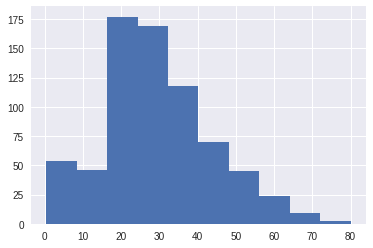

In [21]:
train_data['Age'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


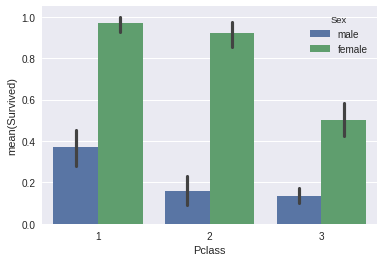

In [0]:
# visualizacion
import seaborn as sns
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


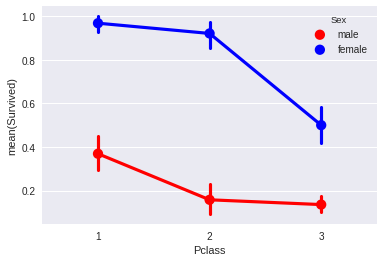

In [0]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=train_data,palette={'male':'red', 'female':'blue'})

## Agrupar información categorica

#### Discretización (valores categóricos)
- Tras Series y DataFrame, objeto para categorías: Categorical
```python
categorias = pd.cut(<valores>, <bins>) 
```

In [0]:
# especificar los bloques
bins = [0,18,35,65,99]
edades = [16,25,18,71,44,100]
categorias = pd.cut(edades,bins)
categorias

[(0, 18], (18, 35], (0, 18], (65, 99], (35, 65], NaN]
Categories (4, interval[int64]): [(0, 18] < (18, 35] < (35, 65] < (65, 99]]

In [22]:
# limpieza de datos
# categorizacion de Age (edad, en categorias)
def cat_age(data):
    data['Age'] = data['Age'].fillna(-0.5)
    bins = (-1,0,12,18,30,60,120)
    cat_names = ['Unknown','Child','Teenager','Young adult','Adult','Elderly']
    categories = pd.cut(data['Age'],bins,labels=cat_names)
    data['Age'] = categories
    return data

train_data = cat_age(train_data)
test_data = cat_age(test_data)

train_data.Age.sample(10)

98           Adult
130          Adult
305          Child
107        Unknown
683       Teenager
815        Unknown
637          Adult
715    Young adult
520    Young adult
596        Unknown
Name: Age, dtype: category
Categories (6, object): [Unknown < Child < Teenager < Young adult < Adult < Elderly]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


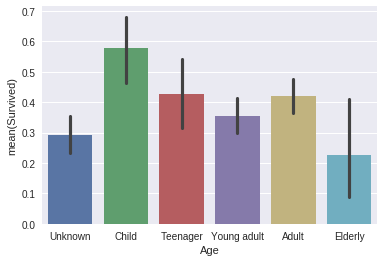

In [23]:
sns.barplot(x='Age',y='Survived',data=train_data)

In [24]:
# extraccion de la letra de la cabina (no numero)
def extract_cabin(data):
    data['Cabin'] = data['Cabin'].fillna('N')
    data['Cabin'] = data['Cabin'].apply(lambda x : x[0])
    return data

train_data = extract_cabin(train_data)
test_data = extract_cabin(test_data)

train_data.Cabin.sample(10)

452    C
366    D
842    N
737    B
8      N
407    N
687    N
159    N
345    F
67     N
Name: Cabin, dtype: object

In [25]:
# categorizacion de Fare (precio del ticket, en cuartiles)
def cat_fare(data):
    data['Fare'] = data['Fare'].fillna(-0.5)
    cat_names = ['Unknown','1st','2nd','3rd','4rd']
    data['Fare'] = pd.qcut(data['Fare'],5,labels=cat_names)
    return data

train_data = cat_fare(train_data)
test_data = cat_fare(test_data)

train_data.Fare.sample(10)

526        1st
770        1st
103        1st
793        3rd
131    Unknown
618        3rd
540        4rd
741        4rd
283        1st
820        4rd
Name: Fare, dtype: category
Categories (5, object): [Unknown < 1st < 2nd < 3rd < 4rd]

In [26]:
# extraer info del nombre (Mr, Ms...)
def extract_title(data):
    data['Title'] = data['Name'].apply(lambda x : x.split(' ')[1])
    return data

train_data = extract_title(train_data)
test_data = extract_title(test_data)

train_data.Title.sample(10)

284      Mr.
239      Mr.
889      Mr.
420      Mr.
754     Mrs.
519      Mr.
177    Miss.
576    Miss.
277      Mr.
886     Rev.
Name: Title, dtype: object

In [27]:
# Eliminacion de datos poco informativos (Name, Ticket)
def drop_columns(data,columns):
    return data.drop(columns,axis=1)

columns_to_drop = ['Name','Ticket','Embarked']
train_data = drop_columns(train_data,columns_to_drop)
test_data = drop_columns(test_data,columns_to_drop)

train_data.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title
793,794,0,1,male,Unknown,0,0,3rd,N,Mr.
128,129,1,3,female,Unknown,1,1,3rd,F,Miss.
708,709,1,1,female,Young adult,0,0,4rd,N,Miss.
323,324,1,2,female,Young adult,1,1,3rd,N,Mrs.
731,732,0,3,male,Child,0,0,2nd,N,Mr.
97,98,1,1,male,Young adult,0,1,4rd,D,Mr.
6,7,0,1,male,Adult,0,0,4rd,E,Mr.
153,154,0,3,male,Adult,0,2,2nd,N,"Billiard,"
641,642,1,1,female,Young adult,0,0,4rd,B,Mlle.
646,647,0,3,male,Young adult,0,0,1st,N,Mr.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


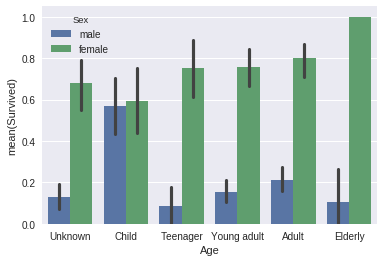

In [28]:
# representar los datos categoricos
# Edad vs supervivencia
sns.barplot(x='Age',y='Survived',hue='Sex',data=train_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


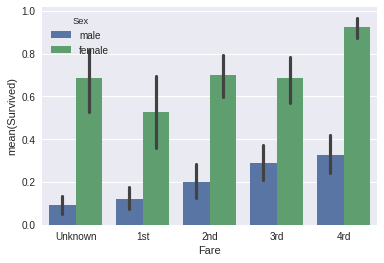

In [29]:
# Precio del ticket vs supervivencia
sns.barplot(x='Fare',y='Survived',hue='Sex',data=train_data)

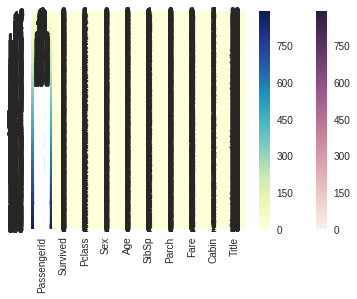

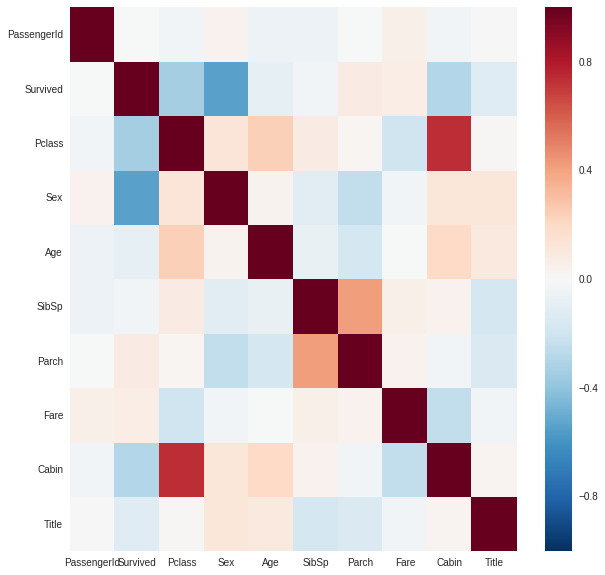

In [0]:
ax = sns.heatmap(train_data, annot=True, fmt="d")
ax = sns.heatmap(train_data, cmap="YlGnBu")
import seaborn as sns
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


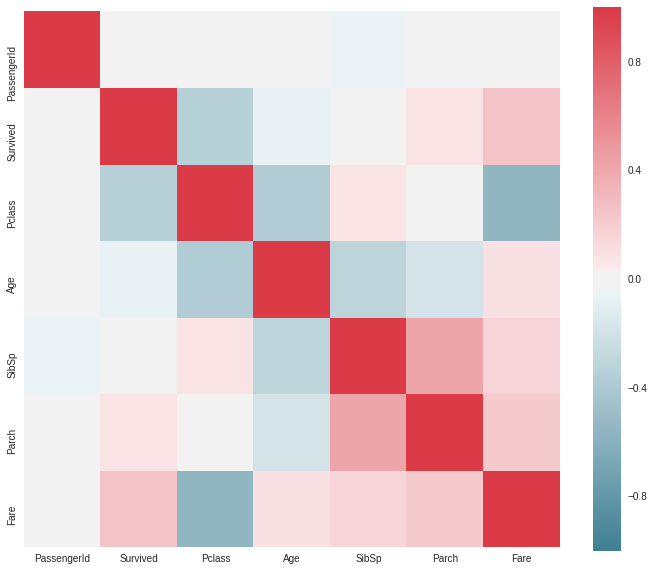

In [19]:

f, ax = plt.subplots(figsize=(12, 10))
corr = train_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Preparandonos para el ML

In [37]:
# Preparar para machine learning
# transformar datos en etiquetas numericas
from sklearn import preprocessing

def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Title']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
train_data, test_data = encode_features(train_data, test_data)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title
0,1,0,3,1,5,1,0,4,7,19
1,2,1,1,0,0,1,0,3,2,20
2,3,1,3,0,5,0,0,0,7,16
3,4,1,1,0,0,1,0,3,2,20
4,5,0,3,1,0,0,0,0,7,19


In [0]:
from sklearn.model_selection import train_test_split

# dividir train/validating sets
X = train_data.drop(['Survived'],axis=1)
Y = train_data['Survived']

validation_size=0.15
seed = np.random.randint(1000)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

**El concepto de los árboles de decisión es dividir el conjunto de datos de forma jerárquica en trozos cada vez menores hasta llegar a trozos donde los ejemplos son todos, o prácticamente todos, de la misma clase. **

In [39]:
# Decision tree ML
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
# Evaluacion
# test accuracy on validation set
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
prediction = model.predict(X_validation)
print('Accuracy: {}'.format(accuracy_score(prediction,Y_validation)))
print(confusion_matrix(Y_validation,prediction))
print(classification_report(Y_validation,prediction))

Accuracy: 0.7238805970149254
[[63 19]
 [18 34]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        82
           1       0.64      0.65      0.65        52

   micro avg       0.72      0.72      0.72       134
   macro avg       0.71      0.71      0.71       134
weighted avg       0.72      0.72      0.72       134



| | Event |  NoEvent  |
| ------------- | --- | --- |
| Event | TruePositive | FalsePositive
| NoEvent | FalsePositive | TrueNegative